In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MARKET_NAME = 'DOW_30'
MODEL_BASE_NAME = 'RL_CNN'

In [3]:
long_only_df = pd.read_csv(f'{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers_long_only.csv')
long_short_df = pd.read_csv(f'{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')

In [4]:
long_only_df.head(3)

,gamma_trade,gamma_risk,seed,excess_return,excess_risk,sharpe,is_pareto
0,20.0,316.0,0,-0.097223,0.424573,-0.228989,True
1,5.0,562.0,0,-0.054588,0.424585,-0.128568,True
2,3.0,562.0,0,-0.036223,0.424775,-0.085275,True


In [5]:
long_short_df.head(3)

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,1.0,1000.0,1.0,0,-7.420131,1.500748,-4.944288,True
1,1.0,10000.0,1000.0,0,-4.320232,1.516543,-2.848737,True
2,1000.0,100000.0,10000.0,0,-4.312632,1.578043,-2.732899,True


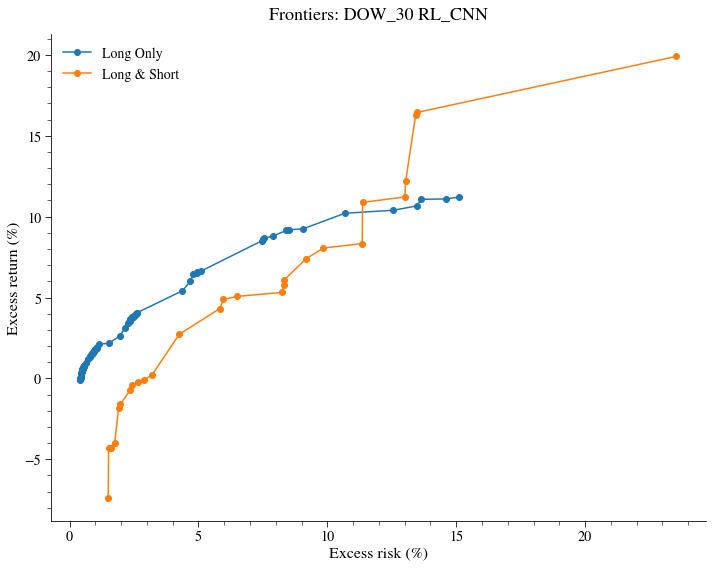

In [6]:
seed = 0
frontier_dict = {
    'Long Only': long_only_df,
    'Long & Short': long_short_df,
}

fig, ax = plt.subplots(figsize=(10,8))

for name, df in frontier_dict.items():
    frontier_df = df[(df['seed']==seed) & (df['is_pareto']==True)]
    ax.plot(frontier_df['excess_risk'], frontier_df['excess_return'], '-o', label=name) # frontier

ax.set_xlabel('Excess risk (%)')
ax.set_ylabel('Excess return (%)')
plot_title = f'Frontiers: {MARKET_NAME} {MODEL_BASE_NAME}'
ax.set_title(plot_title)
ax.legend()

# if xlim != None:
#     ax.set_xlim(xlim)

# if ylim != None:
#     ax.set_ylim(ylim)